Download the dataset and load the data

In [52]:
%pip install kagglehub
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

import kagglehub
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
# Download the dataset
path = kagglehub.dataset_download("thedevastator/online-retail-transaction-data")

# print the path
print("Path to dataset files:", path)


Path to dataset files: C:\Users\franc\.cache\kagglehub\datasets\thedevastator\online-retail-transaction-data\versions\1


Display the dataset and ETL process

In [54]:
data = pd.read_csv(path + "/online_retail.csv")

data.head()
#print("Info:") 
#data.info()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [55]:

# Check the total number of rows before cleaning
print(f"Total rows before cleaning: {data.shape[0]}")

# Cleaning the data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert InvoiceDate to datetime
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]  # Remove rows with negative values

# Create a new column for the total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Check the total number of rows after cleaning
print(f"Total rows after cleaning: {data.shape[0]}")

# Display the first few rows of the cleaned dataset
data.head()



Total rows before cleaning: 541909
Total rows after cleaning: 530104


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calc params for futher analysis

In [56]:
# most recent date
current_date = data['InvoiceDate'].max()

# RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                   # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

# Rename the column
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# 3. Normalizzazione dei dati, non so se serve
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


Kmeans

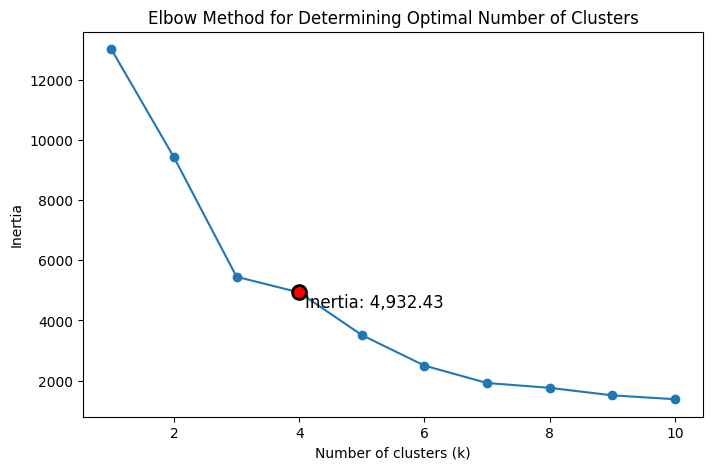


Number and percentage of customers in each cluster:
Cluster 0: 2171 customers (50.05%)
Cluster 1: 1326 customers (30.57%)
Cluster 3: 828 customers (19.09%)
Cluster 2: 13 customers (0.30%)


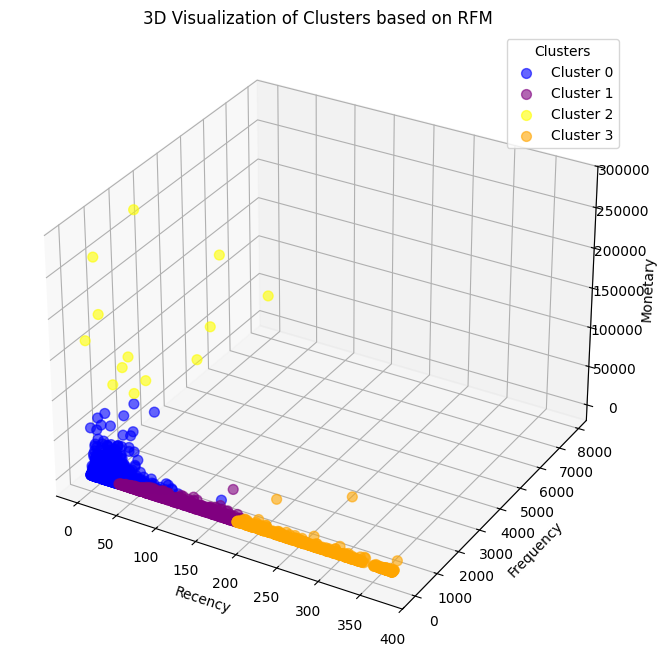

            Recency    Frequency       Monetary
Cluster                                        
0         19.990788   135.285122    2645.818172
1         97.218703    37.719457     773.877083
2          3.692308  2565.307692  126118.310000
3        271.407005    25.138889     605.842525


In [58]:
# 4. Elbow Method
inertia = []
k_range = range(1, 11)  # Number of clusters from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label="Inertia")

# Highlight the elbow with a red dashed circle
#optimal_k = 4  # Assuming the elbow is at k=4
#circle = plt.Circle((optimal_k, inertia[optimal_k-1]), 0.5, color='red', fill=False, linestyle='--', linewidth=2)
#plt.gca().add_artist(circle)

# Add the red point for the elbow
plt.scatter(optimal_k, inertia[optimal_k-1], color='red', s=100, edgecolors='black', linewidth=2, zorder=5)

# Show the inertia value at the elbow point
plt.text(optimal_k + 0.1, inertia[optimal_k-1] - 500, f'Inertia: {inertia[optimal_k-1]:,.2f}', fontsize=12)

plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')

plt.show()

# 5. Apply KMeans with the optimal number of clusters (e.g., k=4)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans_optimal.fit_predict(rfm_scaled)

# 6. Calculate the percentage of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts(normalize=True) * 100

# Calculate the absolute number of customers in each cluster
cluster_sizes = rfm['Cluster'].value_counts()

# Print the number and percentage for each cluster
print("\nNumber and percentage of customers in each cluster:")
for cluster in cluster_sizes.index:
    percentage = cluster_counts[cluster]
    size = cluster_sizes[cluster]
    print(f"Cluster {cluster}: {size} customers ({percentage:.2f}%)")


# 7. 3D Scatter plot based on RFM
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster with different colors
colors = ['blue', 'purple', 'yellow', 'orange']  # 4 distinct colors

for i, cluster in enumerate(np.unique(rfm['Cluster'])):
    ax.scatter(rfm['Recency'][rfm['Cluster'] == cluster], 
               rfm['Frequency'][rfm['Cluster'] == cluster], 
               rfm['Monetary'][rfm['Cluster'] == cluster], 
               c=colors[i], label=f'Cluster {cluster}', s=50, alpha=0.6)

# Add labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualization of Clusters based on RFM')

# Add legend
ax.legend(title="Clusters")

# Show the plot
plt.show()


# Calcolare le medie delle variabili RFM per ciascun cluster
cluster_centroids = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_centroids)


Silhoutte

Average silhouette score: 0.3588


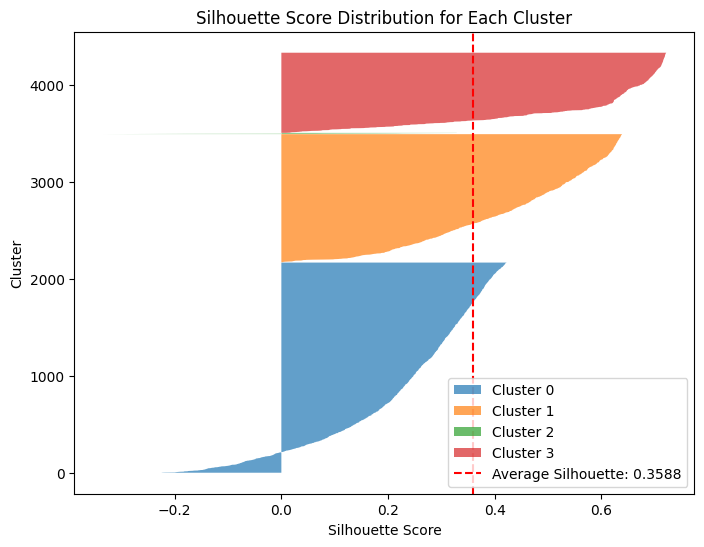

In [59]:
# Calculate silhouette scores for each point
silhouette_values = silhouette_samples(rfm_scaled, kmeans_optimal.labels_)

# Calculate the average silhouette score
silhouette_avg = np.mean(silhouette_values)
print(f"Average silhouette score: {silhouette_avg:.4f}")

# Create a plot for the silhouette scores for each cluster
fig, ax = plt.subplots(figsize=(8, 6))

# For each cluster, calculate and plot the silhouette scores
y_lower, y_upper = 0, 0
for i in range(optimal_k):
    # Get the silhouette scores for points in cluster i
    cluster_silhouette_values = silhouette_values[kmeans_optimal.labels_ == i]
    
    # Sort the silhouette scores for cluster i
    cluster_silhouette_values.sort()
    
    # Calculate the limits for each cluster
    y_upper = y_lower + len(cluster_silhouette_values)
    
    # Plot the silhouette scores for the cluster i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7, label=f"Cluster {i}")
    
    # Update the lower limit for the next cluster
    y_lower = y_upper

# Plot a vertical line for the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average Silhouette: {silhouette_avg:.4f}")

# Add labels and title
ax.set_xlabel("Silhouette Score")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Score Distribution for Each Cluster")
ax.legend()

plt.show()